In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_survived = pd.read_csv("gender_submission.csv")

In [3]:
print("Shape of train: ", train.shape)
print("Shape of test: ", test.shape)
print("Shape of test_survived: ", test_survived.shape)

Shape of train:  (891, 12)
Shape of test:  (418, 11)
Shape of test_survived:  (418, 2)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train["train/test"] = "Train"
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [8]:
#Masukkan "Survived" ke dataset.
test= test.merge(test_survived)
test.insert(1,"survived", value=test["Survived"])
test.drop(columns="Survived", inplace=True)
test.rename(columns={"survived" : "Survived"}, inplace=True)

test["train/test"] = "Test"
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [9]:
df = pd.concat([train,test])
print("Shape of df:", df.shape)
df.head()

Shape of df: (1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train/test   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 143.2+ KB


In [11]:
df.set_index("PassengerId", inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
# Rata rata missing value per kolom
df.isna().sum()/df.shape[0]*100

Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age           20.091673
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Cabin         77.463713
Embarked       0.152788
train/test     0.000000
dtype: float64

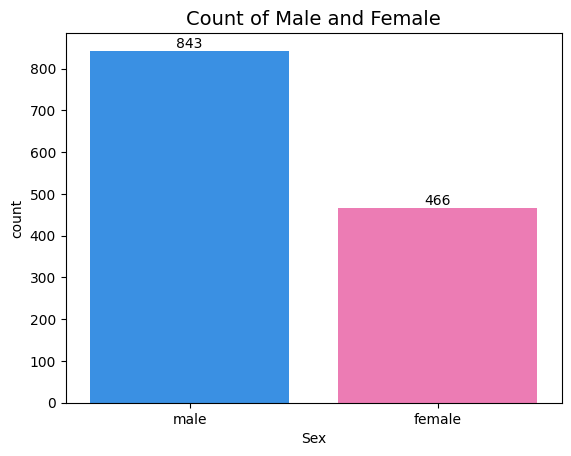

In [14]:
ax = sns.countplot(data=df, x="Sex", palette=sns.color_palette(["#1e90ff", "#ff69b4"]))

# Adding bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Male and Female", size=14, color="black")
plt.show()


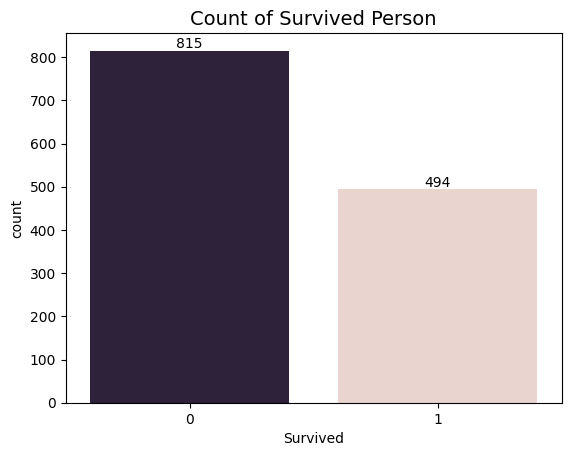

In [15]:
ax = sns.countplot(data=df, x="Survived",palette=sns.cubehelix_palette(2,reverse=True))
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Survived Person",size=14,color="black")
plt.show()

Text(0.5, 1.0, 'Count of Survived by Sex')

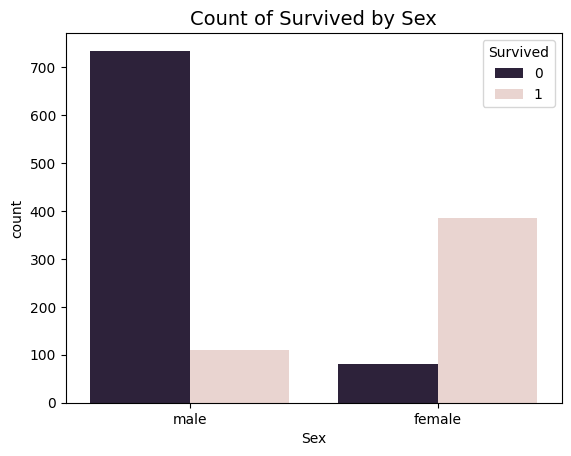

In [16]:
ax = sns.countplot(data=df, x="Sex", hue="Survived",palette=sns.cubehelix_palette(2,reverse=True))
plt.title("Count of Survived by Sex", size=14)

Text(0.5, 1.0, 'Count of Survived by Embarked')

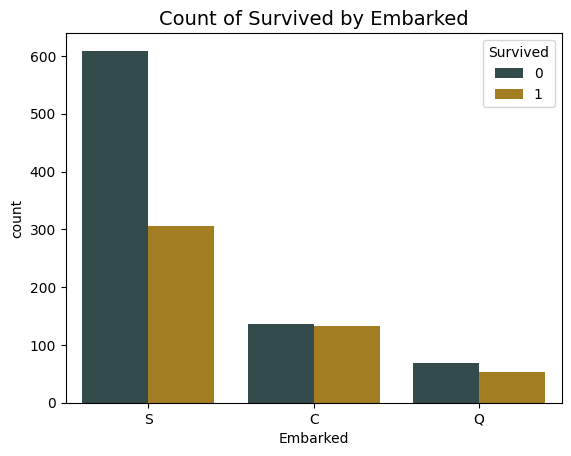

In [17]:
ax=sns.countplot(data=df, x="Embarked", hue="Survived", palette=sns.color_palette(["#2f4f4f","#b8860b"]))
plt.title("Count of Survived by Embarked", size=14)

Text(0.5, 1.0, 'Count of Survived by Class')

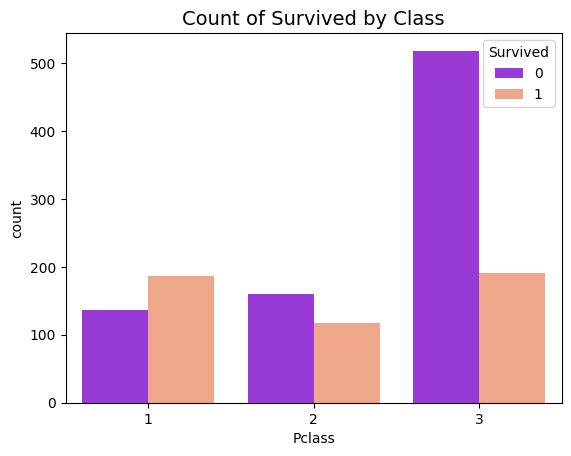

In [18]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived", palette=sns.color_palette(["#a020f0","#ffa07a"]))
plt.title("Count of Survived by Class", size=14)

<AxesSubplot: xlabel='Age', ylabel='Count'>

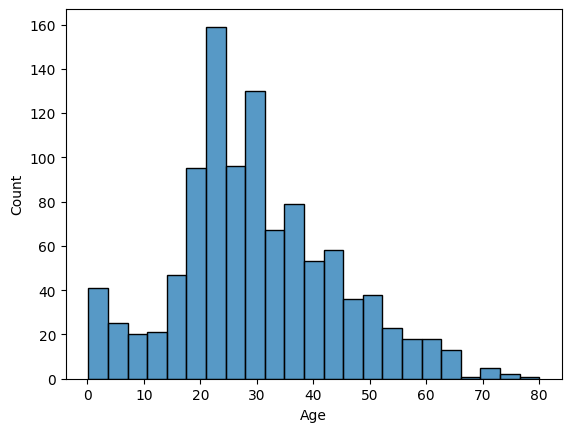

In [19]:
sns.histplot(x=df.Age)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df["Fare"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1))

Text(0.5, 1.0, 'Distribution of Features and values of survivor')

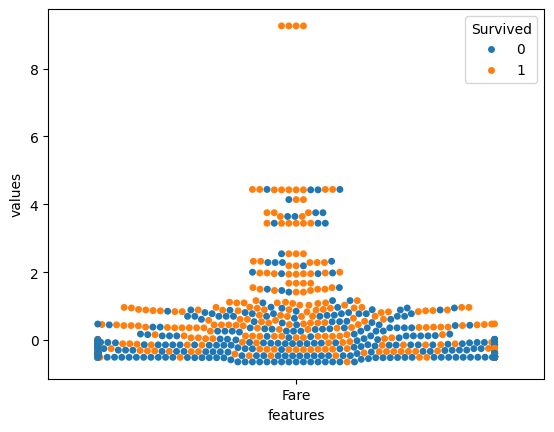

In [21]:
df_melt = pd.melt(df[["Survived","Fare"]], id_vars="Survived", var_name="features", value_name="values")
sns.swarmplot(data=df_melt,x="features", y="values",hue="Survived")
ax.set_xlabel("features",size = 20, alpha=0.8)
ax.set_ylabel("values",size=20,alpha=0.8)
ax.set_title("Distribution of Features and values of survivor",size=14)

In [22]:
df["Sex"] = [1 if each == "male" else 0 for each in df.Sex]
df.replace({"C":0, "Q":1, "S":2},inplace=True)
numeric_df=df.select_dtypes(include=[int,float])
if 'Survived' in df.columns:
    numeric_df['Survived'] = df['Survived']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.503402,NaN,2.0,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.734222,C85,0.0,Train
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.490356,NaN,2.0,Train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.382778,C123,2.0,Train
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.487940,NaN,2.0,Train


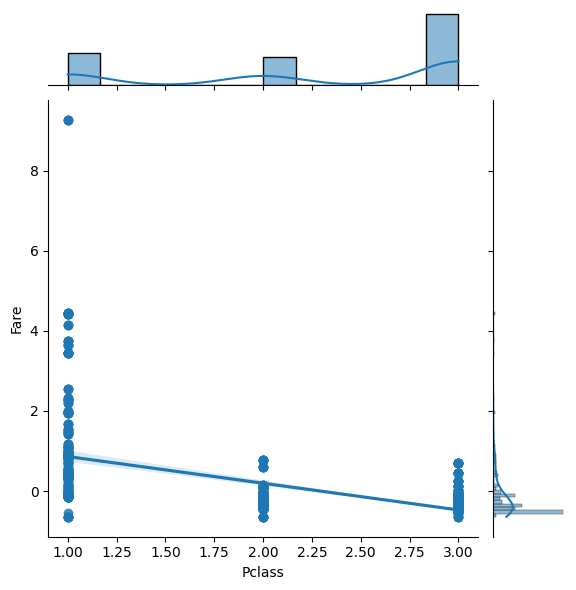

In [23]:
sns.jointplot(data=df, x="Pclass", y="Fare", kind="reg")

<AxesSubplot: >

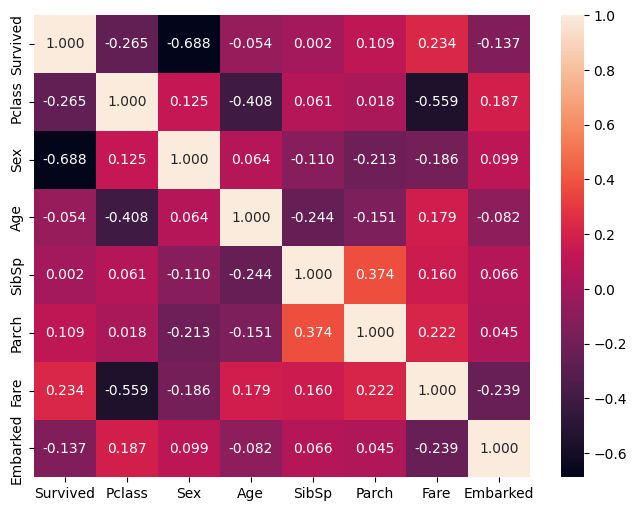

In [25]:
#Matrix Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f")

In [26]:
#Drop kolom yang tidak berpengaruh ke model
df.drop(columns=["Name", "SibSp", "Ticket", "Age", "Fare", "Cabin"],inplace=True)

In [27]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Parch         0
Embarked      2
train/test    0
dtype: int64

In [28]:
#Drop baris dengan values Na
df.dropna(subset=["Embarked"],inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Parch,Embarked,train/test
PassengerId,,,,,,
1,0,3,1,0,2.0,Train
2,1,1,0,0,0.0,Train
3,1,3,0,0,2.0,Train
4,1,1,0,0,2.0,Train
5,0,3,1,0,2.0,Train


In [30]:
categorical_features = ["Pclass","Sex","Parch","Embarked"]
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [31]:
df.head()

,Survived,train/test,Pclass_2,Pclass_3,Sex_1,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_1.0,Embarked_2.0
PassengerId,,,,,,,,,,,,,,
1,0,Train,False,True,True,False,False,False,False,False,False,False,False,True
2,1,Train,False,False,False,False,False,False,False,False,False,False,False,False
3,1,Train,False,True,False,False,False,False,False,False,False,False,False,True
4,1,Train,False,False,False,False,False,False,False,False,False,False,False,True
5,0,Train,False,True,True,False,False,False,False,False,False,False,False,True


In [32]:
df_train = df[df["train/test"] == "Train"]
df_test = df[df["train/test"] == "Test"]

In [33]:
train_x = df_train.drop(columns=["Survived","train/test"])
train_y = df_train["Survived"]

test_x = df_test.drop(columns=["Survived","train/test"])
test_y = df_test["Survived"]

print("train_x shape :",train_x.shape)
print("train_y shape :",train_y.shape)
print("test_X shape :",test_x.shape)
print("test_y shape :",test_y.shape)

train_x shape : (889, 12)
train_y shape : (889,)
test_X shape : (418, 12)
test_y shape : (418,)


In [37]:
# Determine the x and y
x = df.drop(columns=["Survived","train/test"])
y = df["Survived"]

Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg0 = LogisticRegression()
grid= {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV(logreg0,grid,cv=10)
logreg_cv.fit(x,y)
print("Best parameters of Logistic Regression :",logreg_cv.best_params_)

Best parameters of Logistic Regression : {'C': 100.0, 'penalty': 'l2'}


In [36]:
logreg = LogisticRegression(C=logreg_cv.best_params_["C"] , penalty=logreg_cv.best_params_["penalty"])
logreg.fit(train_x,train_y) 
print("Logistic Regression Accuracy :",logreg.score(test_x,test_y))

Logistic Regression Accuracy : 0.9832535885167464


KKN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn0 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn0, {"n_neighbors": np.arange(1,50)}, cv=10)
knn_cv.fit(x,y)
print("Best parameters of KNN :",knn_cv.best_params_)

Best parameters of KNN : {'n_neighbors': 21}


In [39]:
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_["n_neighbors"])
knn.fit(train_x,train_y.values)
print("KNN Accuracy :",knn.score(test_x,test_y))

KNN Accuracy : 0.916267942583732


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_x,train_y)
print("Random Forest Accuracy: ",rf.score(test_x,test_y))

Random Forest Accuracy:  0.8779904306220095


In [56]:
# Make predictions on the test set
predictions2 = rf.predict(test_x)

# Create a DataFrame for the submission
output = pd.DataFrame({
    "PassengerId": test_x.index,  # Ensure test_x has PassengerId as its index or adjust accordingly
    "Survived": predictions2
})

# Save the DataFrame to a CSV file
submission.to_csv("submission_randomforest.csv", index=False)

SVC

In [42]:
from sklearn.svm import SVC

grid = {"C":np.arange(1,7,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(x,y)
print("Best parameters of SVC :",svm_cv.best_params_)

Best parameters of SVC : {'C': 1, 'gamma': 0.005}


In [43]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)
svm.fit(train_x,train_y)
print("SVC Accuracy :",svm.score(test_x,test_y))

SVC Accuracy : 1.0


In [57]:
# GridSearchCV to find the best parameters for SVC
grid = {"C": np.arange(1, 7, 1), 'gamma': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(train_x, train_y)
print("Best parameters of SVC:", svm_cv.best_params_)

# Train the SVC model with the best parameters
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"], random_state=42)
svm.fit(train_x, train_y)

# Evaluate the model
accuracy = svm.score(test_x, test_y)
print("SVC Accuracy:", accuracy)

# Make predictions on the test set
predictions = svm.predict(test_x)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    "PassengerId": test_x.index,  # Ensure test_x has PassengerId as its index or adjust accordingly
    "Survived": predictions
})

# Save the DataFrame to a CSV file
submission.to_csv("submission_svc.csv", index=False)


Best parameters of SVC: {'C': 1, 'gamma': 0.5}
SVC Accuracy: 0.9019138755980861


Cross Validation Score

In [44]:
from sklearn.model_selection import cross_val_score
algorithms = [logreg,knn,rf,svm]

for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=x, y=y, cv=30)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

LogisticRegression(C=100.0): 	 0.8570119802677941
KNeighborsClassifier(n_neighbors=21): 	 0.8413319238900635
RandomForestClassifier(random_state=42): 	 0.8507751937984497
SVC(C=1, gamma=0.005, random_state=42): 	 0.8554968287526427


F1 Scores

In [45]:
from sklearn.metrics import f1_score

for alg in algorithms:
    scores = f1_score(test_y, alg.predict(test_x),average=None)
    print("{0}: \t {1}".format(alg,scores))

LogisticRegression(C=100.0): 	 [0.98676749 0.9771987 ]
KNeighborsClassifier(n_neighbors=21): 	 [0.9380531  0.87084871]
RandomForestClassifier(random_state=42): 	 [0.90941385 0.81318681]
SVC(C=1, gamma=0.005, random_state=42): 	 [1. 1.]


Classification Report and Confusion Matrix

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

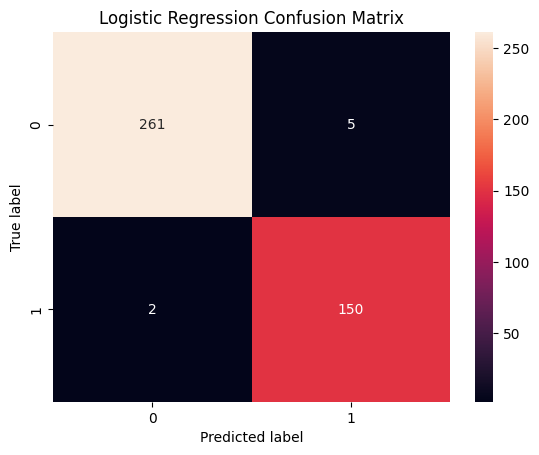

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

logreg_prediction = logreg.predict(test_x)
plt.figure()
sns.heatmap(confusion_matrix(test_y, logreg_prediction), annot=True, fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix")

In [47]:
print(classification_report(test_y, logreg_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.97      0.99      0.98       152

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



SVM

Text(0.5, 1.0, 'SVM Confusion Matrix')

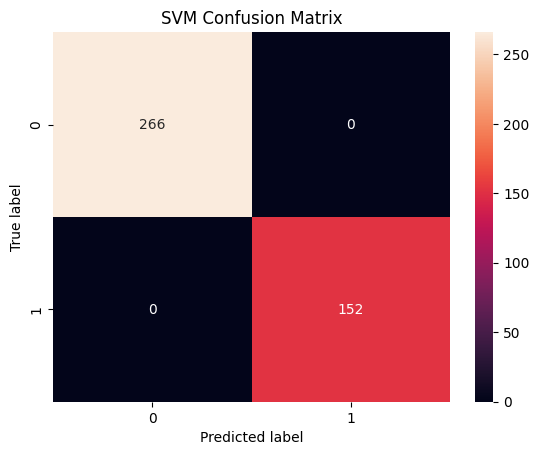

In [49]:
svm_prediction = svm.predict(test_x)
plt.figure()
sns.heatmap(confusion_matrix(test_y, svm_prediction), annot=True, fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("SVM Confusion Matrix")

In [50]:
print(classification_report(test_y, svm_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



Logistic Regression Curve

In [52]:
logreg_pred_proba = logreg.predict_proba(test_x)

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])

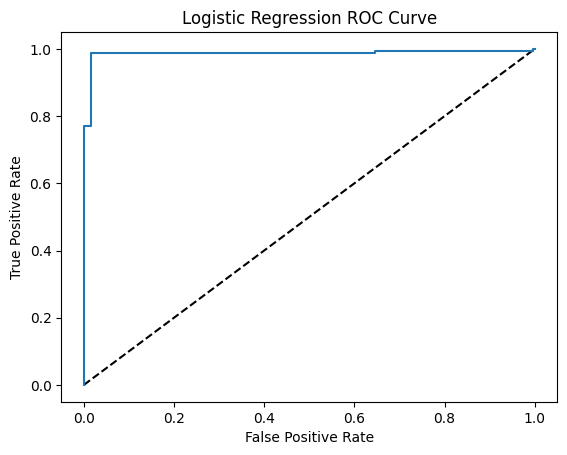

In [54]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()